In [1]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()


In [2]:
data['data'].shape

(20640, 8)

In [3]:
data['target'].shape

(20640,)

In [4]:
data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [63]:
import pandas as pd
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, data['target'], test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(r2_score(y_train, y_train_pred))

print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

0.5179331255246699
0.6125511913966952
0.5558915986952442
0.575787706032451


In [9]:
model.predict(X_train.loc[1, :].values.reshape([1, -1]))

/Users/etsygankov/dev/lambdahandler/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.99952])

In [10]:
print(X_train.loc[1, :].values.reshape([1, -1]))

[[ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]]


In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

### EDA

In [13]:
import sweetviz as sv

full_ds = df.copy()
full_ds['MedHouseVal'] = data['target']
# full_ds.head()
report = sv.analyze(full_ds, target_feat='MedHouseVal')
report.show_html('dataviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report dataviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### StandardScaler & Ridge Regression

In [69]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    data.data,
    data.target,
    return_estimator=True,
    n_jobs=2,
)


In [70]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


In [72]:
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=data.feature_names,
)

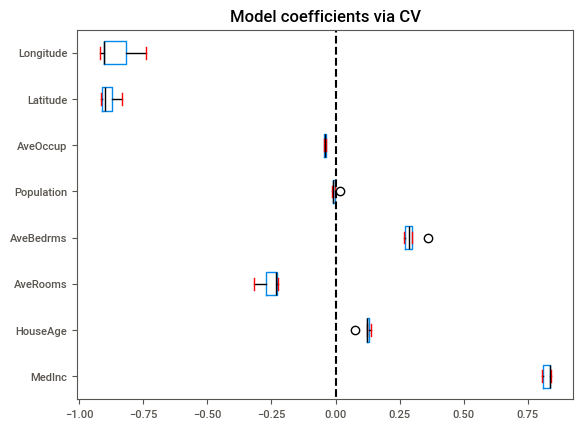

In [79]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "red"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Model coefficients via CV")